<a href="https://colab.research.google.com/github/MUKHTAR280506/Deep-Learning-Bank-Customer-Churn-model/blob/main/Bank_Customer_Churn_prediction_model_using_Deep_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Bank Churn model prediction using Deep learning

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score


In [5]:
data = pd.read_csv("https://raw.githubusercontent.com/MUKHTAR280506/BANK-CUSTOMER-CHURN-ML-MODEL/refs/heads/main/Churn_Modelling.csv")

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
data = pd.get_dummies(data,columns=["Geography","Gender"], dtype= int, drop_first=True)

In [14]:
X= data.drop("Exited", axis=1)
y= data["Exited"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 87)
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [50]:
model = Sequential()
model.add(Dense(4,activation="relu", input_dim=11))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 4)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53 (212.00 B)

 Trainable params: 53 (212.00 B)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(loss ="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [53]:
history = model.fit(X_train_scaled,y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3767 - loss: 1.0729 - val_accuracy: 0.4950 - val_loss: 0.7758
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5718 - loss: 0.6911 - val_accuracy: 0.7119 - val_loss: 0.5975
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7478 - loss: 0.5693 - val_accuracy: 0.7906 - val_loss: 0.5278
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8031 - loss: 0.5109 - val_accuracy: 0.8081 - val_loss: 0.4886
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8051 - loss: 0.4765 - val_accuracy: 0.8081 - val_loss: 0.4635
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7991 - loss: 0.4716 - val_accuracy: 0.8119 - val_loss: 0.4456
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8216 - loss: 0.4405 - val_accuracy: 0.8144 - val_loss: 0.4321
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8088 - loss: 0.4369 - val_accu

In [54]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.04085499],
       [0.31629   ],
       [0.11246124],
       ...,
       [0.10588243],
       [0.165881  ],
       [0.788329  ]], dtype=float32)

In [55]:
y_pred = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [56]:
y_pred = np.where(y_pred >0.5 ,1,0)

In [57]:
accuracy_score(y_test, y_pred)

0.8475

In [44]:
model.layers[0].get_weights()

[array([[ 0.29696408,  0.08630581, -0.3496816 , -0.38439083],
        [-3.423322  ,  1.984267  , -0.17514344, -1.1034352 ],
        [ 0.02818246,  0.30911916, -0.03961833, -0.37472874],
        [ 0.15144448, -0.5405827 , -0.40398872,  0.8648816 ],
        [-0.10083858, -0.75032514,  0.15145771,  0.2942236 ],
        [-0.125813  ,  0.24279408, -0.1664186 , -0.7222281 ],
        [-0.8945481 ,  3.0504014 ,  2.819648  , -1.2358074 ],
        [ 0.1146505 ,  0.1342046 , -0.20810914,  0.13958885],
        [ 0.07222863,  0.33135313, -0.8881198 ,  0.7870829 ],
        [-0.02641491,  0.38965175, -0.25927588, -0.4004069 ],
        [-0.24069034, -0.01625057,  0.24182647, -1.3305789 ]],
       dtype=float32),
 array([0.8765408 , 1.5458198 , 1.018139  , 0.71040076], dtype=float32)]

In [45]:
history.history

{'accuracy': [0.8360937237739563,
  0.836718738079071,
  0.8360937237739563,
  0.8365625143051147,
  0.836718738079071,
  0.8373437523841858,
  0.8364062309265137,
  0.8364062309265137,
  0.8360937237739563,
  0.8368750214576721,
  0.8368750214576721,
  0.8364062309265137,
  0.8365625143051147,
  0.8356249928474426,
  0.8362500071525574,
  0.8364062309265137,
  0.8365625143051147,
  0.8368750214576721,
  0.8362500071525574,
  0.8359375,
  0.836718738079071,
  0.8371875286102295,
  0.8381249904632568,
  0.8373437523841858,
  0.8365625143051147,
  0.8376562595367432,
  0.8370312452316284,
  0.8371875286102295,
  0.8365625143051147,
  0.8370312452316284,
  0.8368750214576721,
  0.8370312452316284,
  0.8368750214576721,
  0.8378124833106995,
  0.8370312452316284,
  0.8365625143051147,
  0.8371875286102295,
  0.836718738079071,
  0.836718738079071,
  0.836718738079071,
  0.8371875286102295,
  0.8373437523841858,
  0.836718738079071,
  0.8371875286102295,
  0.8374999761581421,
  0.8376562595

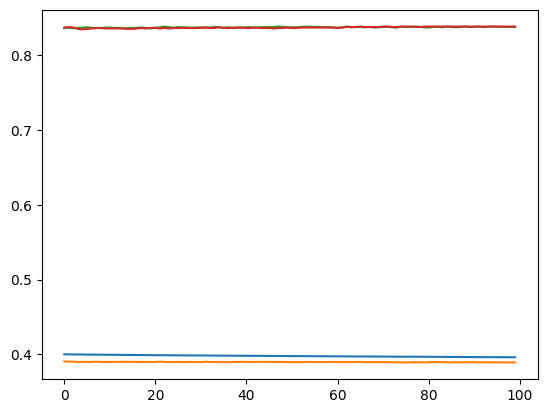

In [49]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [58]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scaled, y_train)
accuracy_score(y_test,model_rf.predict(X_test_scaled))

0.8585